In [52]:
!kaggle datasets download -d yasserh/wine-quality-dataset

Dataset URL: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset
License(s): CC0-1.0
wine-quality-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [53]:
import zipfile

# Unzip the dataset
with zipfile.ZipFile('wine-quality-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset_directory')

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [185]:
df = pd.read_csv('/kaggle/working/dataset_directory/WineQT.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [186]:
df.drop('Id', axis=1, inplace=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [187]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [188]:
df.drop_duplicates(inplace=True)
df.shape

(1018, 12)

In [189]:
scaler = StandardScaler()

In [190]:
X_total = df.drop('quality', axis=1)
y_total = df['quality']

In [191]:
y_total.value_counts()

quality
5    433
6    409
7    122
4     33
8     15
3      6
Name: count, dtype: int64

In [192]:
y_total -= 3

In [193]:
y_total.value_counts()

quality
2    433
3    409
4    122
1     33
5     15
0      6
Name: count, dtype: int64

In [194]:
X, X_test, y, y_test = train_test_split(X_total, y_total, test_size=0.5, random_state=42, stratify=y_total)

In [195]:
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=df.columns[:-1])

<Axes: >

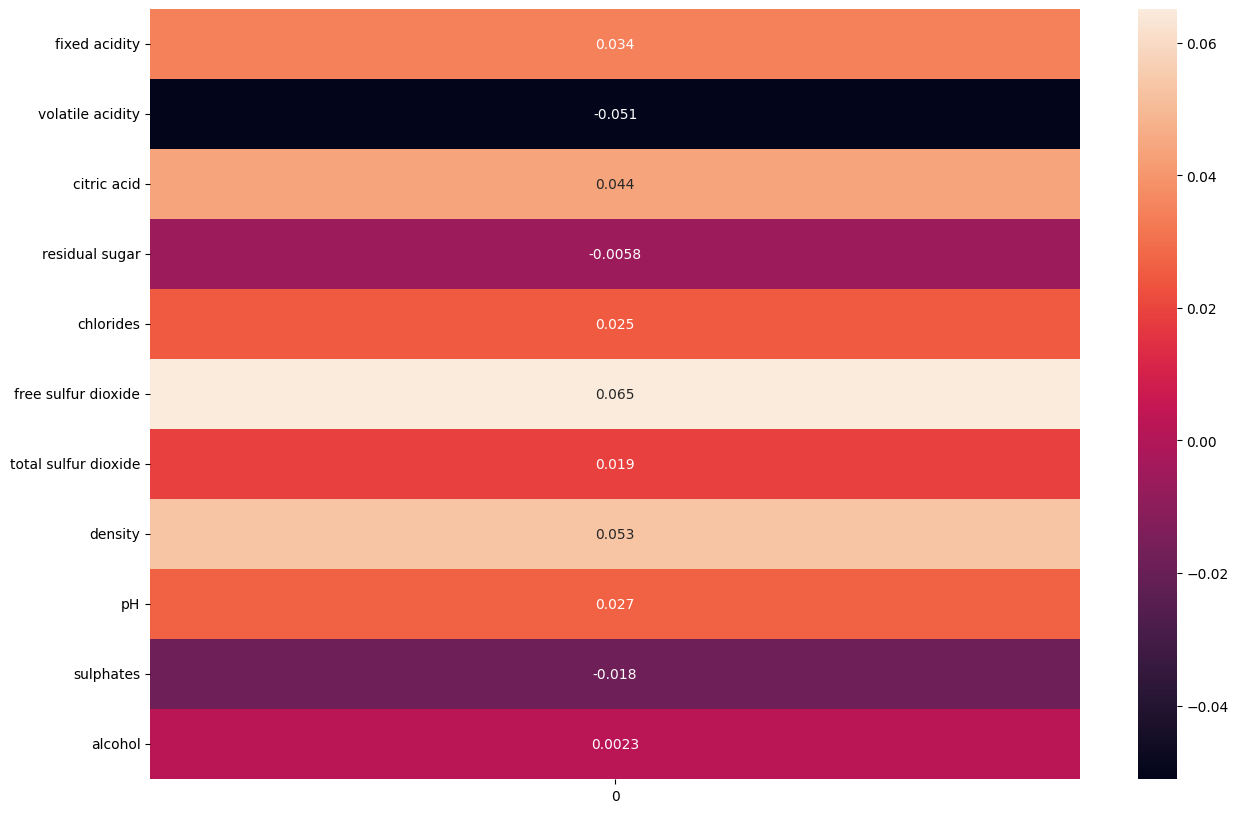

In [196]:
cm = X.corrwith(y).to_frame()
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True)

<Axes: >

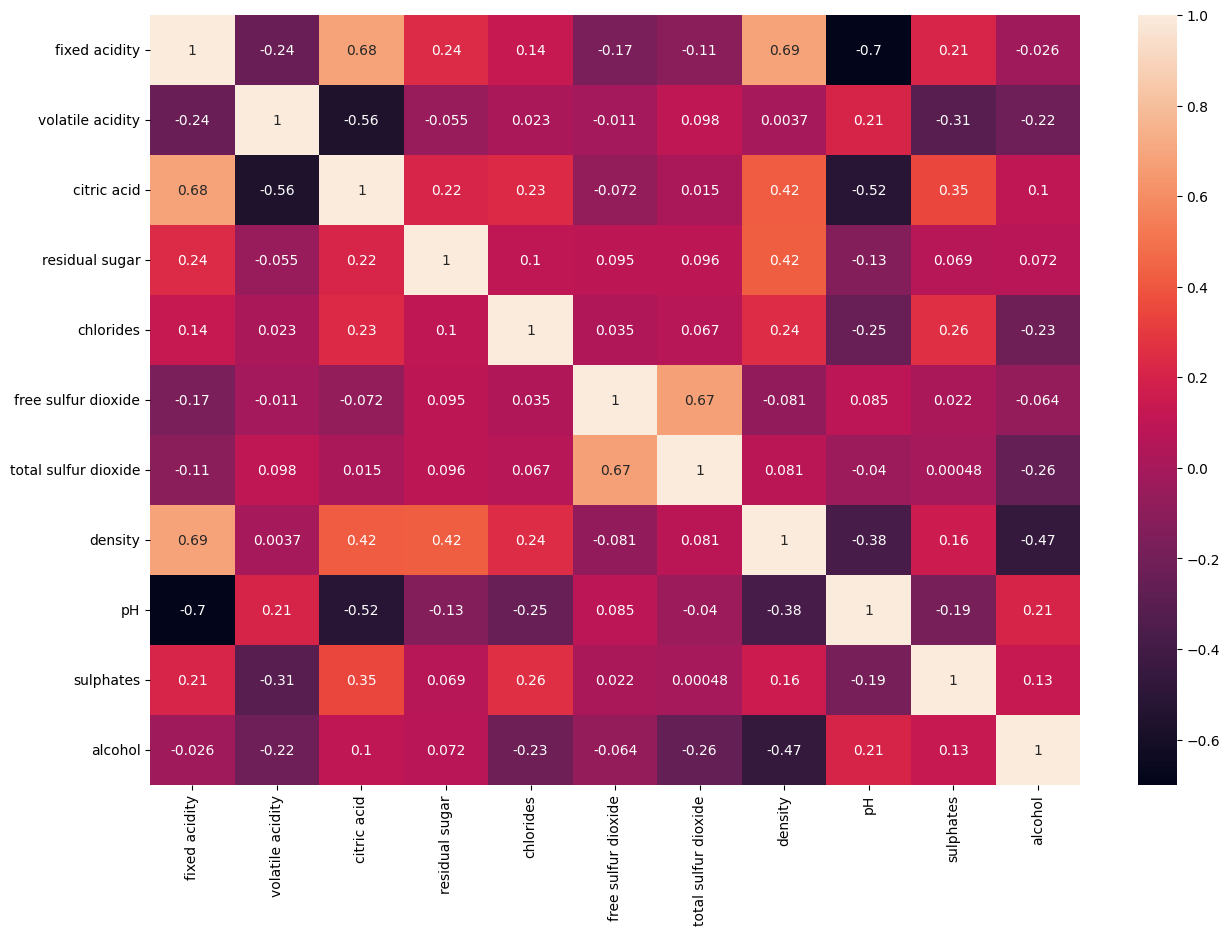

In [197]:
cm1 = X.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cm1, annot=True)

In [198]:
from sklearn.decomposition import PCA

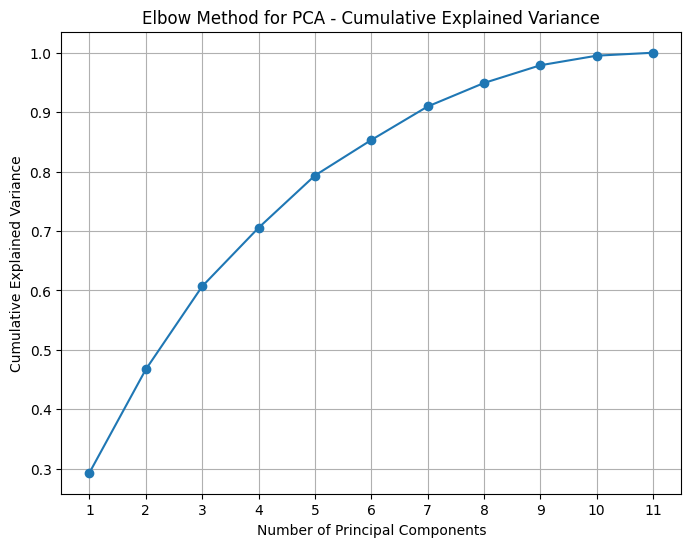

In [199]:
pca = PCA()
pca.fit(X)

# Plot the explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot the Elbow method (Cumulative Explained Variance)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Elbow Method for PCA - Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid(True)

In [200]:
n_components_90_variance = np.argmax(cumulative_variance >= 0.90) 
print(f'Number of components explaining 90% variance: {n_components_90_variance}')

Number of components explaining 90% variance: 6


In [201]:
X_pca = pca.transform(X)[:, :n_components_90_variance]

In [202]:
X_pca.shape

(509, 6)

In [203]:
X_train = X_pca
y_train = y

In [204]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

In [205]:
knn = KNeighborsClassifier(n_neighbors = 4)  # n_neighbors is the number of neighbors to consider
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=2)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
model = knn.fit(X_resampled,y_resampled)

In [206]:
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=df.columns[:-1])
#X_test = X_test.drop(['fixed acidity', 'free sulfur dioxide'], axis=1)


In [207]:
X_test = pca.transform(X_test)[:, :n_components_90_variance]
X_test = pd.DataFrame(X_test)

Accuracy: 0.42
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.05      0.18      0.08        17
           2       0.62      0.54      0.58       216
           3       0.55      0.33      0.41       205
           4       0.26      0.41      0.31        61
           5       0.08      0.29      0.12         7

    accuracy                           0.42       509
   macro avg       0.26      0.29      0.25       509
weighted avg       0.52      0.42      0.45       509



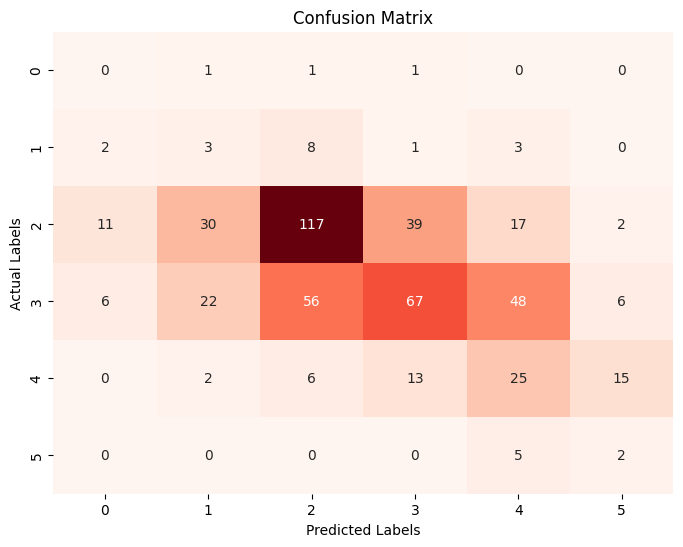

In [208]:
y_pred = knn.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [209]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define model
model_nn = Sequential()
model_nn.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))  # Adjust the input shape
model_nn.add(Dense(64, activation='relu'))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(16, activation='relu'))
model_nn.add(Dense(6, activation='softmax'))  # 6 output classes, adjust if different

model_nn.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 6)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,862 (46.34 KB)

 Trainable params: 11,862 (46.34 KB)

 Non-trainable params: 0 (0.00 B)

In [210]:
# Compile model
model_nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Train model
history = model_nn.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
                       callbacks=[early_stopping, reduce_lr])

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 262ms/step - accuracy: 0.2698 - loss: 1.6785 - val_accuracy: 0.4361 - val_loss: 1.3616 - learning_rate: 0.0010
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4486 - loss: 1.2744 - val_accuracy: 0.5187 - val_loss: 1.1638 - learning_rate: 0.0010
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5486 - loss: 1.0927 - val_accuracy: 0.5580 - val_loss: 1.1128 - learning_rate: 0.0010
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5744 - loss: 1.0543 - val_accuracy: 0.5697 - val_loss: 1.0886 - learning_rate: 0.0010
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5841 - loss: 1.0347 - val_accuracy: 0.5580 - val_loss: 1.0869 - learning_rate: 0.0010
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5982 - loss: 0.9668 - val_accuracy: 0.5678 - val_loss: 1.0717 - learning_rate: 0.0010
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6133 - loss: 0.9255 - val_accuracy

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5660 - loss: 1.0772 
Accuracy: 0.5599214434623718
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        17
           5       0.63      0.69      0.66       216
           6       0.50      0.56      0.53       205
           7       0.48      0.36      0.41        61
           8       0.00      0.00      0.00         7

    accuracy                           0.56       509
   macro avg       0.27      0.27      0.27       509
weighted avg       0.53      0.56      0.54       509



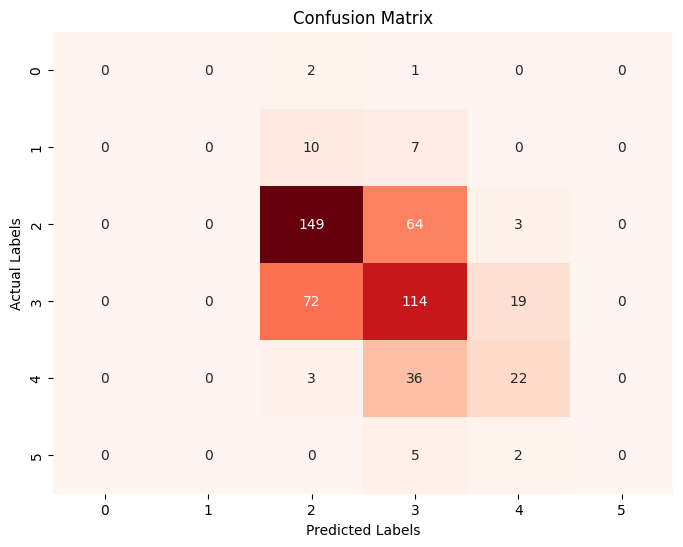

In [211]:
# Predict on test data
y_pred = model_nn.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class predictions

# Print evaluation metrics
print("Accuracy:", model_nn.evaluate(X_test, y_test)[1])
print("Classification Report:\n", classification_report(y_test+3, y_pred_classes+3))

cm = confusion_matrix(y_test+3, y_pred_classes+3)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Clustering

In [ ]:
df = pd.read_csv('/content/dataset_directory/WineQT.csv')


In [ ]:
df.drop('Id', axis=1, inplace=True)
df.drop_duplicates(inplace=True)

In [ ]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
df.shape

(1018, 12)

In [ ]:
scaler = StandardScaler()

In [ ]:
X= df.drop('quality', axis=1)
y= df['quality']

In [ ]:
X.duplicated().sum()
X.shape

(1018, 11)

In [ ]:
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=df.columns[:-1])

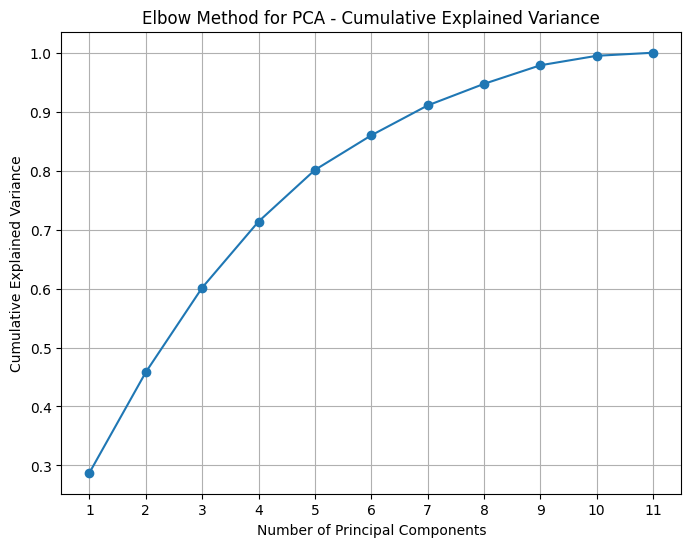

In [ ]:
pca = PCA()
pca.fit(X)

# Plot the explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot the Elbow method (Cumulative Explained Variance)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Elbow Method for PCA - Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid(True)

In [ ]:
n_components_90_variance = np.argmax(cumulative_variance >= 0.90) + 1
print(f'Number of components explaining 90% variance: {n_components_90_variance}')

Number of components explaining 90% variance: 7


In [ ]:
X_pca = pca.transform(X)[:, :n_components_90_variance]

In [ ]:
from sklearn.cluster import KMeans

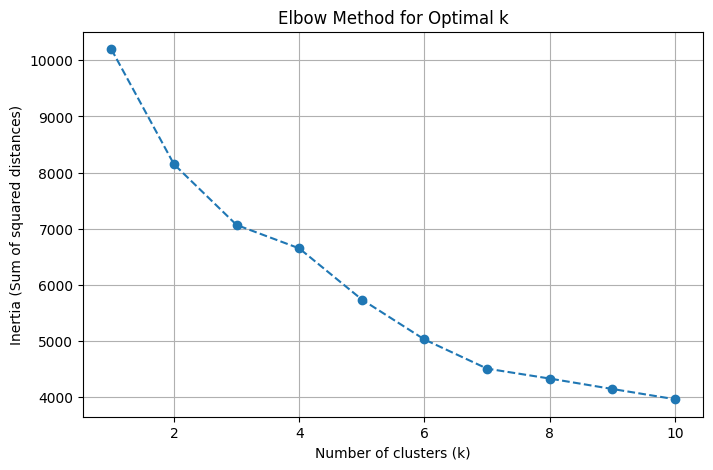

In [ ]:
inertia = []  # To store inertia values for each k
K = range(1, 11)  # Values of k to try (1 to 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o', linestyle='--')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [ ]:
!pip install kneed
from kneed import KneeLocator

In [ ]:
kneedle = KneeLocator(K, inertia, curve='convex', direction='decreasing')
optimal_k = kneedle.elbow

print(f'Optimal number of clusters: {optimal_k}')

Optimal number of clusters: 6


In [ ]:
# Initialize KMeans with 4 clusters
kmeans = KMeans(n_clusters=6, random_state=42)

# Fit the model to the data
kmeans.fit(X_pca)

# Get the predicted cluster labels
y_kmeans = kmeans.predict(X_pca)

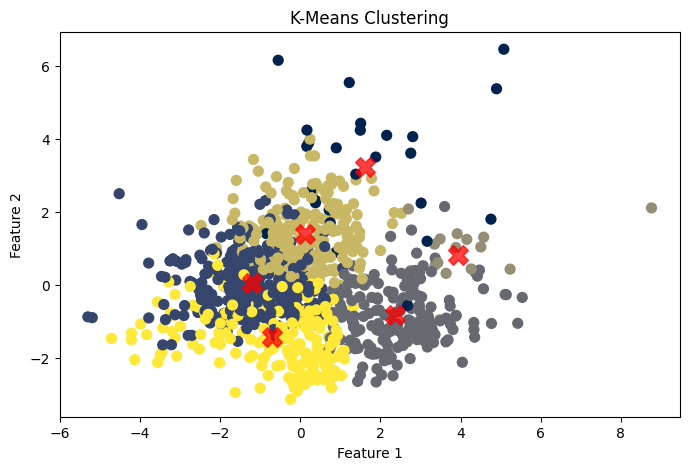

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='cividis')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')

plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
# Get the coordinates of cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)

# Measure the inertia (sum of squared distances to the closest cluster center)
print("Inertia (Sum of Squared Distances):", kmeans.inertia_)

Cluster Centers:

 [[ 1.62338467  3.22644405  1.50210515 -1.82513942  2.48969916  0.14822959

  -1.02776626]

 [-1.2044169   0.0553574  -0.89626735  0.15665897  0.19454568  0.0625646

   0.01290109]

 [ 2.37019572 -0.83518939 -0.31069155 -0.43582799 -0.11485939  0.10557654

   0.2798197 ]

 [ 3.94068603  0.8236128   0.67171265  5.98506313  1.41246314 -1.23934838

  -0.95749407]

 [ 0.10614281  1.39892823  0.42812783 -0.05901805 -0.68285698  0.023905

   0.0101513 ]

 [-0.71396872 -1.4225213   1.28586507 -0.08609729  0.06900468 -0.16432916

  -0.09013857]]

Inertia (Sum of Squared Distances): 5025.89009053081
